In [25]:
#Author: Cong Zhu, Wanqi Chen
#Date: 2020/12
from urllib.request import urlopen, urlretrieve
import time
from bs4 import BeautifulSoup
import os
import pandas as pd
import numpy as np
import csv
import requests
import math
import datetime

## 1. Craw PubMed Publications given specified key word(s) and timeframe
The function return two dataframes: 1) abstract dataframe (PMID,title,abstract,publication date) 2) authors dataframe in long format (PMID, author names)

In [26]:
'''modify the pathway as necessary'''
os.getcwd()

'/Users/wq/Google Drive/PH1975 Project'

In [27]:
import pub_retrieve as pr

### 1.1 Extract records and save into two data files that store abstract information and author information

In [ ]:
abstract_tab, author_tab = pr.pubmed_record().tab_generate()

In [7]:
abstract_tab.shape

(492, 4)

In [8]:
author_tab.shape

(5181, 2)

In [9]:
abstract_tab.head()

,Title,PMID,Publication Date,Abstract
0,[Stereotactic body radiotherapy: Passing fad o...,31864665,2020/2/01,Stereotactic body radiotherapy (SBRT) is a you...
0,Status and innovations in pre-treatment CT ima...,31642709,2020/3/01,Pre-treatment CT imaging is a topic of growing...
0,HDR Prostate Brachytherapy,31727300,2020/1/01,Brachytherapy has become an essential pillar i...
0,Image-Guided Gynecologic Brachytherapy for Cer...,31727296,2020/1/01,The incorporation of magnetic resonance imagin...
0,Alternatives to Surgery for Early-Stage Non-Sm...,32402355,2020/6/01,Lung cancer is the leading cause of cancer dea...


In [10]:
author_tab.head()

,PMID,Authors
0,31864665,Alexis Vallard
1,31864665,Nicolas Vial
2,31864665,Omar Jmour
3,31864665,Amel Rehailia-Blanchard
4,31864665,Jane-Chloé Trone


### 1.2 Save as csv 

In [9]:
author_tab.to_csv("author_tab.csv")
abstract_tab.to_csv("abstract_tab.csv")

## 2. Create SQL database and extract publication information by author names

In [10]:
import sql_dump as sdp

### 2.1 Load csv files and convert them into SQL databases

In [11]:
sdp.sql_dump('author_tab.csv', 'abstract_tab.csv')

author_tab.db is created
abstract_tab.db is created


C:\Users\M-U-h\anaconda3\envs\Analyses\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


### 2.2 Extract publication records by author names from SQL database
Extracted information is saved as csv file give entered information

In [14]:
pick_authors = sdp.pick_authors('Sarah Hazell','Xia Jiang','X Jiang','Mary B Daly')

In [15]:
pick_authors.pub_rec("Extract_records")

In [17]:
'''check results'''
pub_check = pd.read_csv("Extract_records.csv")
pub_check.head()

,Title,PMID,Author Name,Abstract
0,Image-Guided Gynecologic Brachytherapy for Cer...,31727296,Sarah Hazell,The incorporation of magnetic resonance imagin...
1,Fine-mapping of 150 breast cancer risk regions...,31911677,Xia Jiang,Genome-wide association studies have identifie...
2,Fine-mapping of 150 breast cancer risk regions...,31911677,Mary B Daly,Genome-wide association studies have identifie...


## 3. Visualization

In [21]:
import visualization as vs

### 3.1 Bar Plot by Month

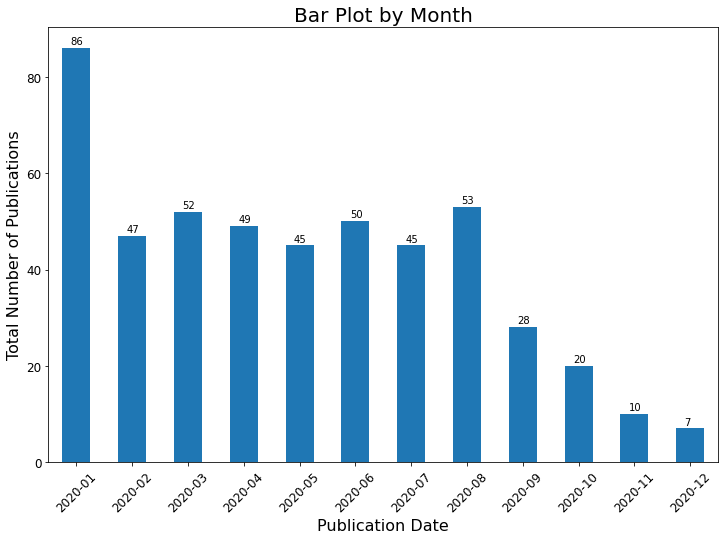

True

In [22]:
vs.bar_plot(abstract_tab, rotation=45)

### 3.2 Line Plot by Month 

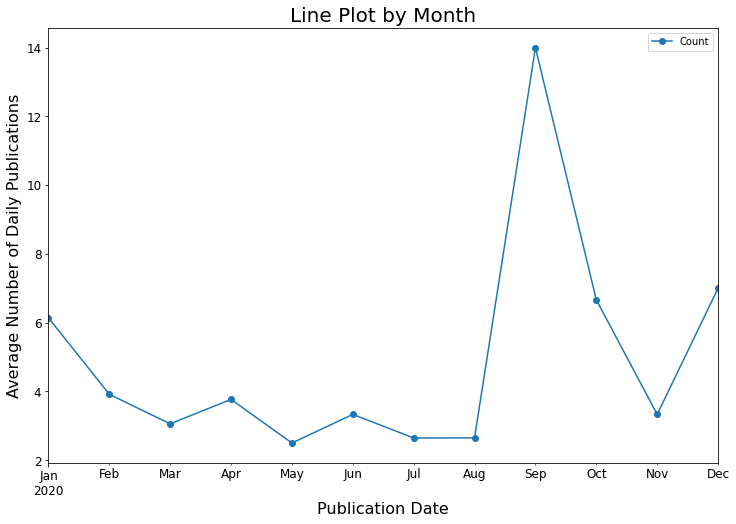

True

In [23]:
vs.line_plot(abstract_tab)

### 3.3 Table of Descriptive Statistics

In [24]:
vs.describe(abstract_tab)

         count       mean        std  min  25%   50%    75%   max
Month                                                            
2020-01   14.0   6.142857  18.388362  1.0  1.0   1.0   1.00  70.0
2020-02   12.0   3.916667   7.038315  1.0  1.0   2.0   2.50  26.0
2020-03   17.0   3.058824   5.471181  1.0  1.0   2.0   2.00  24.0
2020-04   13.0   3.769231   8.795395  1.0  1.0   1.0   2.00  33.0
2020-05   18.0   2.500000   4.162154  1.0  1.0   1.5   2.00  19.0
2020-06   15.0   3.333333   6.410557  1.0  1.0   1.0   2.00  26.0
2020-07   17.0   2.647059   3.872034  1.0  1.0   1.0   2.00  17.0
2020-08   20.0   2.650000   3.313052  1.0  1.0   2.0   2.25  16.0
2020-09    2.0  14.000000  18.384776  1.0  7.5  14.0  20.50  27.0
2020-10    3.0   6.666667   9.814955  1.0  1.0   1.0   9.50  18.0
2020-11    3.0   3.333333   4.041452  1.0  1.0   1.0   4.50   8.0
2020-12    1.0   7.000000        NaN  7.0  7.0   7.0   7.00   7.0


True